# Metropolis sampling 

In [4]:
def UnnormalizedBeta(alpha, beta):
    def beta_f(x):
        if x < 0:
            return 0
        if x >1:
            return 0
        return x**(alpha-1) * (1-x)**(beta - 1)
    return beta_f

In [5]:
import numpy as np
def MetropolisSampler(unnormalized_pdf=UnnormalizedBeta(2, 3), 
                      n_sample=100, x_0=0.5):
    '''
    First version of the metropolis sampler
    args: 
    - unnormalized_pdf: the unnormalized pdf we want to sample from 
    - n_sample: the size of the sample to output
    - x_0: the starting point of the algo
    '''
    x = x_0
    sample = [x]
    for _ in range(n_sample):
        x_prop = np.random.normal(loc=x)
        unif = np.random.uniform()
        acceptance_ratio = unnormalized_pdf(x_prop)/unnormalized_pdf(x)
        if acceptance_ratio > unif:
            x = x_prop
        sample.append(x)
    return sample

def MetropolisSamplerFaster(unnormalized_pdf=UnnormalizedBeta(2, 3), n_sample=100, x_0=0.5):
    '''
    Metropolis sampler. It is faster than the first version
    because all the random number are generated before the for loop
    args: 
    - unnormalized_pdf: the unnormalized pdf we want to sample from 
    - n_sample: the size of the sample to output
    - x_0: the starting point of the algo
    Possible things to improve:
    directly provide the acceptance ratio instead of having to compute the 
    ratio every time
    '''
    x= x_0
    sample = [x]
    random_numbers = np.random.normal(size=n_sample)
    unif_nums = np.random.uniform(size=n_sample)
    for rnum, unif in zip(random_numbers, unif_nums):
        x_prop = x + rnum
        acceptance_ratio = unnormalized_pdf(x_prop)/unnormalized_pdf(x)
        if acceptance_ratio > unif:
            x = x_prop
        sample.append(x)
    return sample

In [6]:
%timeit MetropolisSamplerFaster(n_sample=10**5)
%timeit MetropolisSampler(n_sample=10**5)

582 ms ± 70.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.26 s ± 29.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
beta_sample = MetropolisSampler(n_sample=10**5)

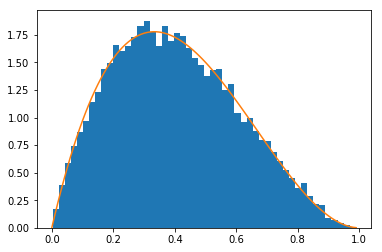

In [13]:
import pylab as plt
%matplotlib inline
plt.hist(beta_sample, bins=50, normed=True);
x = np.arange(0,1,0.01)
plt.plot(x, x*(1-x)**2*12)

# Metropolis-Hastings sampling

In [72]:
def MetropolisHastingsSamplerWithExp(unnormalized_pdf=UnnormalizedBeta(2, 3), 
                      n_sample=100, x_0=0.5, only_metropolis=False):
    '''
    First version of the metropolis sampler
    args: 
    - unnormalized_pdf: the unnormalized pdf we want to sample from 
    - n_sample: the size of the sample to output
    - x_0: the starting point of the algo
    - with_correction: 
    '''
    x = x_0
    sample = [x]
    for _ in range(n_sample):
        x_prop = np.random.exponential(scale=x)
        unif = np.random.uniform()
        if x_prop != 0:
            x_trans =  x/x_prop - x_prop/x 
            correction = np.exp(-x_trans) * x/x_prop
        else:
            continue
        if only_metropolis:
            correction = 1
        acceptance_ratio = unnormalized_pdf(x_prop)/unnormalized_pdf(x) * correction
        if acceptance_ratio > unif:
            x = x_prop
        sample.append(x)
    return sample

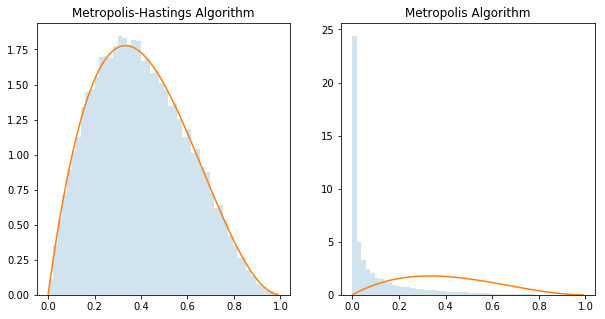

In [74]:
x = np.arange(0,1,0.01)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
beta_sample = MetropolisHastingsSamplerWithExp(n_sample=10**5)
plt.hist(beta_sample, bins=50, normed=True, alpha=0.2);
plt.title('Metropolis-Hastings Algorithm')
plt.plot(x, x*(1-x)**2*12)

plt.subplot(1, 2, 2)
beta_sample_no_correc = MetropolisHastingsSamplerWithExp(n_sample=10**5, only_metropolis=True)
plt.hist(beta_sample_no_correc, bins=50, normed=True, alpha=0.2);
plt.title('Metropolis Algorithm')
plt.plot(x, x*(1-x)**2*12)